As part of our CDD, we decided to explore the L(2,1) labeling problem. This problem is also known as “Radio Coloring” because of its applications in assigning frequencies to different radio stations. There are a few different rules related to this problem. 

1. Each vertices will be colored with a number.
2. If two vertices are neighbors and connected by one edge, the difference in their labels must be at least 2.
3. For every vertex, if you go out two edges it shouldn’t share the same label as the vertex on the other end. The simpler way of explaining this is if you have a list of neighbors for every vertex, the neighbors of those neighbors can’t have the same label as the original vertex.

As mentioned the application of this problem is largely focus on assigning frequencies to stations so that there isn't interference caused by stations which are too close either in distance or in frequency.  The original conjecture which people have sough to prove is that if a graph G has a maximum degree of $k$, the most labels needed would be $k^{2}$. While this has yet to be proven for every graph, many partial results have been achieved. 

- Chang and Kuo proved that any L(d,1)-labeling problem can be generalised to be solved in $k^{2} + (d-1)k$ labels which means for L(2,1) labeling it would be $k^{2} + k$
- The original conjecture has been proven for 2-regular graphs (Griggs and Yeh), 3-regular Hamiltonian graphs (Füredi and Kang), and for the incidence graphs of projective planes (Füredi and Kang).
- Griggs and Yeh also proved that for any L(2d, d) labeling problem the maximum amount of labels can be obtained from the L(2,1) labeling of the same graph.
There have been specifics bounds proven for special classes of graphs such as paths, cycles, wheels, etc.

For our CDD, we wanted to do something coding related as well, so we decided to create an algorithm that would label any cycle graph with the minimum number of labels possible.

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 


def create_cycle(num):
    """
    Return cycle graph

    Args:
        num: number of vertices

    Returns:
        A networkx graph of a cycle with num vertices.
    """
    network = nx.Graph() # Creating the graph and adding nodes
    nodes = range(num) # Creating list of number labels for each node
    network.add_nodes_from(nodes) # Creating nodes
    nx.add_cycle(network, nx.nodes(network)) # Adding edges to make a cycle out of all nodes in the network
    #nx.draw_networkx(network, with_labels=True) # Draws existing graph
    return nx.Graph(network)


Once we created our cycle, we started thinking about the best way to make sure we are meeting all the requirements for labeling. We thought of two different paths here. We could iterate through every element in a list of potential labels and create a set of conditionals to check if it works. If it doesn't work, it would move onto the next label in the list and continue onward until it finds a label which satisfies the conditions. The second method we thought of was attempting to narrow the list of possible labels for each node and then going based off that. Since we set up our labels as a dictionary and updated it after every change, we knew that we could access what the already assigned labels were for past vertices. In this method, we would create a list of values the vertex could not be labeled with and then take those values out of the possible labels list. After that, we choose the lowest possible value to label the node. We ended up implementing the second method since we felt it would be more efficient for larger graphs.

[0, 2, 4, 0, 2, 4, 6]


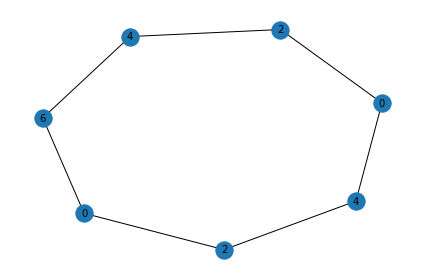

No of unique labels are: 4
The span is: 7


In [4]:
network = create_cycle(7)
node_list = list(nx.nodes(network))
label_list = dict.fromkeys(node_list)

for i in node_list:
    neighbors_list = list(nx.all_neighbors(network, i))
    bad_list=[]
    for k in neighbors_list:
        if label_list[k] is not None:
            bad_list.append(label_list[k])
            bad_list.append(label_list[k]+1)
            bad_list.append(label_list[k]-1)
        secondary_neighbor = list(nx.all_neighbors(network, k))
        for j in secondary_neighbor:
            if label_list[j] is not None:
                bad_list.append(label_list[j])
    if bad_list == []:
         label_list[i]=0
    else:
        possible_color=range(0,max(bad_list)+2)
        labels = [x for x in possible_color if x not in bad_list]
        label_list[i]=labels[0]

color_list = list(label_list.values())
print(color_list)
pos = nx.spring_layout(network)
nx.draw_networkx(network,pos,with_labels=False)
  # positions for all nodes
nx.draw_networkx_labels(network, pos, label_list, font_size=10)
plt.tight_layout()
plt.axis("off")
plt.show()

# Counts the number of unique labels to see how many numbers are used
unique_labels = []
count = 0

for item in color_list:
    if item not in unique_labels:
        count += 1
        unique_labels.append(item)
 
print("No of unique labels are:", count)
span=max(color_list)-min(color_list)+1 #Plus 1 since we always start with zero
print("The span is:", span)


In [16]:
number_of_nodes=10
network = create_cycle(number_of_nodes)
node_list = list(nx.nodes(network))
label_list = dict.fromkeys(node_list)
labels=[]
if number_of_nodes>=5:
    number_of_threes=int(number_of_nodes/3)
    for i in range(number_of_threes):
        print("Add 0, 2, 4")
        labels=labels+[0,2,4]
    remander=number_of_nodes%3
    if remander==1:
        print("Add 0, 3, 1, 4")
        labels=labels[:-3]+[0,3,1,4]
    elif remander==2:
        print("Add 1, 3")
        labels=labels+[1,3]
    
print(labels)
for i in range(number_of_nodes):
    label_list[i]=labels[i]
pos = nx.spring_layout(network)
nx.draw_networkx(network,pos,with_labels=False)
  # positions for all nodes
nx.draw_networkx_labels(network, pos, label_list, font_size=10)
plt.tight_layout()
plt.axis("off")
plt.show()

Add 0, 2, 4
Add 0, 2, 4
Add 0, 2, 4
Add 0, 3, 1, 4
[0, 2, 4, 0, 2, 4, 0, 3, 1, 4]


IndexError: list index out of range